In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('heart.csv')

In [3]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df1.shape

(303, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

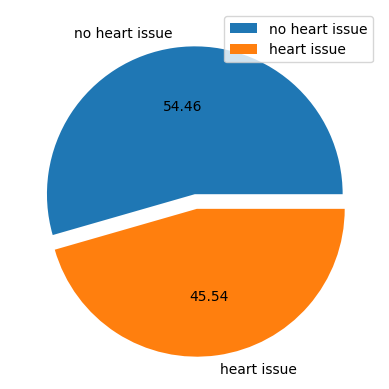

In [11]:
myexplode = [0, 0.1]
mylabels = ["no heart issue","heart issue"]
plt.pie(df1['target'].value_counts(),labels=mylabels,autopct='%.2f',explode = myexplode)
plt.legend()
plt.show()

In [13]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]   

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y,test_size=0.25,random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [17]:
Model=[]

Model.append(("lgrg",LogisticRegression()))
Model.append(("DT",DecisionTreeClassifier()))
Model.append(("svm1",SVC(kernel='linear')))
Model.append(("svm2",SVC(kernel='rbf')))
Model.append(("svm3",SVC(kernel='poly')))
Model.append(("knn",KNeighborsClassifier()))
Model.append(("bc",BaggingClassifier()))
Model.append(("Ada",AdaBoostClassifier()))
Model.append(("GB",GradientBoostingClassifier()))
Model.append(("xgb",XGBClassifier()))

In [24]:
for name,model in Model:
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(name,ac)
    print(train,test)

lgrg 0.881578947368421
0.8325991189427313 0.881578947368421
DT 0.7236842105263158
1.0 0.7236842105263158
svm1 0.868421052631579
0.8414096916299559 0.868421052631579
svm2 0.6578947368421053
0.6475770925110133 0.6578947368421053
svm3 0.6578947368421053
0.6872246696035242 0.6578947368421053
knn 0.6973684210526315
0.7577092511013216 0.6973684210526315
bc 0.7894736842105263
0.9911894273127754 0.7894736842105263
Ada 0.7631578947368421
0.9427312775330396 0.7631578947368421
GB 0.8026315789473685
1.0 0.8026315789473685
xgb 0.8157894736842105
1.0 0.8157894736842105


In [26]:
#Choosing SVC linear classifier to classify the data
mod=SVC(kernel='linear')
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
cm=confusion_matrix(ytest,ypred)
acc=accuracy_score(ytest,ypred)
train=mod.score(xtrain,ytrain)
test=mod.score(xtest,ytest)
print(classification_report(ytest,ypred))
print(cm)
print(acc)
print(train,test)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.83      0.95      0.89        41

    accuracy                           0.87        76
   macro avg       0.88      0.86      0.87        76
weighted avg       0.88      0.87      0.87        76

[[27  8]
 [ 2 39]]
0.868421052631579
0.8414096916299559 0.868421052631579


In [22]:
from sklearn.model_selection import  cross_val_score

In [28]:
cvs = cross_val_score(mod, x,y, cv=5, scoring="accuracy")
print(cvs)
print(cvs.mean()*100)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83060109289619


In [29]:
input_data = ((62,0,0,140,268,0,0,160,0,3.6,0,2,2))

In [30]:
prediction = mod.predict([input_data])
if (prediction[0] == 0):
  print('The person is ok')
else:
  print('The person has heart issue')

The person is ok


In [31]:
import pickle

In [34]:
filename = 'heart_disease_model.sav'
pickle.dump(mod, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [36]:
prediction = loaded_model.predict([input_data])

if (prediction[0] == 0):
    
    print('The person is ok')
else:
    print('The person has heart issue')

The person is ok
